## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
print(df.shape)
print("There are {} many rows ".format(num_rows))

(294478, 5)
There are 294478 many rows 


c. The number of unique users in the dataset.

In [4]:
num_unique_users = df.nunique()['user_id']
print("There are {} many unique users ".format(num_unique_users))

There are 290584 many unique users 


d. The proportion of users converted.

In [5]:
prop_users_convert = (df['converted'].mean())*100
print("There are {}% converted users ".format(prop_users_convert ))

There are 11.96591935560551% converted users 


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#treatment group users land on old page
mistake_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print(mistake_grp1.head())
print("{} treatment group users land on old page".format(len(mistake_grp1)))

#control group users land on new page
mistake_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("{} control group users land on new page".format(len(mistake_grp2)))

#new page and treatment occurances
print("{} new page and treatment mismatchs ".format(len(mistake_grp1) + len(mistake_grp2)))



     user_id                   timestamp      group landing_page  converted
308   857184  2017-01-20 07:34:59.832626  treatment     old_page          0
327   686623  2017-01-09 14:26:40.734775  treatment     old_page          0
357   856078  2017-01-12 12:29:30.354835  treatment     old_page          0
685   666385  2017-01-23 08:11:54.823806  treatment     old_page          0
713   748761  2017-01-10 15:47:44.445196  treatment     old_page          0
1965 treatment group users land on old page
1928 control group users land on new page
3893 new page and treatment mismatchs 


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


From the above there are no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Clean up the the mismatched rows
#Delete the mismatched rows
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
df.to_csv('ab_edited.csv', index=False)

In [11]:
df2 = pd.read_csv('ab_edited.csv')

In [12]:
# Double Check all of the correct rows were removed - this should be 0
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False])
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.info()
#Array of unique user_id values
df2['user_id'].unique()
print('There are {} unique user ids'.format(len(df2['user_id'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB
There are 290584 unique user ids


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#List of False/True for duplicated
df2['user_id'].duplicated()
#Sum the values to get the the number of repeated user ids
sum(df2['user_id'].duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#remove the last entry using the timestamp
timestamp_duplicate = '2017-01-14 02:55:59.590927'
df2 = df2[df2.timestamp != timestamp_duplicate]

#check that it is removed
#List of False/True for duplicated
df2['user_id'].duplicated()
#Sum the values to get the the number of repeated user ids
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2_group = df2.groupby('group')
df2_group.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

The probability that the control group was converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

The probability that the control group was converted is 0.118808

d. What is the probability that an individual received the new page?

In [19]:
#Find the individual who recieved the new page
recieved_new_page_users = len(df.query("group =='treatment'"))
print(recieved_new_page_users)

#Get the total number of users
total_users = df2.shape[0]
print(total_users)

#Calculate the probability
new_user_prob = recieved_new_page_users/total_users
print(new_user_prob)

145311
290584
0.5000653855683727


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Does the new page lead to more conversion?**
- The probability of conversion in the treatment group was ~11.88%
- The probability of conversion in the control group was ~12.04%

These are very small probability and it is suggested that the test be done for a longer period of time if possible in order to really see the effects of the new page. However, only taking this data into account the old page is slightly better than the new page at converting users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{old}$ >=  $p_{new}$
<br></br>
$H_{a}$ : $p_{old}$ <  $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [22]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [23]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)])
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# p_new and p_old have different sizes, so we must truncate the extra values
extra_value = len(new_page_converted) - len(old_page_converted)
print(extra_value)

new_page_converted = new_page_converted[:145274]

p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
print(p_diff) 

36
[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   0.00000000e+00   6.88183883e-06]


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [27]:
#store all 10,000 values in p_diffs

p_diffs = []

for _ in range (10000):
    old_page_convert = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)]).mean()
    new_page_convert = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)]).mean()
    difference = new_page_convert - old_page_convert
    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'Plot of 10,000 simulated p_diffs')

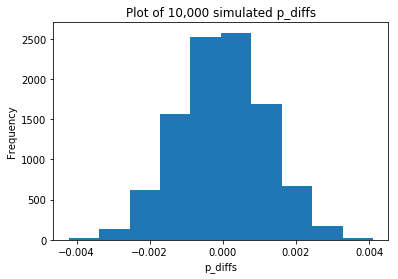

In [28]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 simulated p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Find the difference between the simulated p_diffs and the actual p differences from ab_data.csv
# Compute treatment mean
treatment_mean = df[df['group'] =='treatment']['converted'].mean()

# Compute control mean
control_mean = df[df['group'] =='control']['converted'].mean()

#Compute the actual p_diff

act_p_diff = treatment_mean - control_mean
print(act_p_diff)

#Find the difference from our original dataset
p_diffs = np.array(p_diffs)
print(p_diffs)

#Lets find the proportion of the p_diffs greater than the actualy differences
(act_p_diff < p_diffs).mean()

-0.0015790565976871451
[ 0.00019098 -0.00208728  0.00105087 ...,  0.00235164  0.00155343
 -0.00031194]


0.90610000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Here we have calculated the p-value for the simulated/bootstrapped distribution and for the actual data. Because of acutal p value difference falls within the 95% confidence interval of our bootstrapped distribution we can conclude that the null hypothesis is true and the old page acutally slightly out performs the new page and therefore we should just stick with the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

df2.head()

/Users/ashleyadrias/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [31]:
convert_old =  sum(df2.query("group == 'control'")['converted'])
convert_new =  sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [33]:
#We need to compute the critical z-scores for a 95% confidence interval
from scipy.stats import norm

z_crit = norm.ppf(0.95)
print(z_crit)

1.64485362695


Since our z-score of 1.31092419842 is less than the z critical value of 1.64485362695, we can accept the null hypothesis. Our findings here do support the findings in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will be using logistic regression, which will alllows that understand the probability of a conversion or no conversion. We will get a vavue between 0 and 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#Add the intercept
df['intercept'] = 1

#Fill in the dummy variables for control and treatment
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
import statsmodels.api as sm
log_reg = sm.Logit(df['converted'], df[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results = log_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Apr 2018   Pseudo R-squ.:               8.085e-06
Time:                        22:15:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Here our hypothesis is a little different because we are using logistic regression

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0
<br></br>
$H_{a}$ : $p_{new}$ - $p_{old}$ != 0

The p-value for the ab_page is 0.190. This differs from the results in Part 2, because it was a one-tailed test. For the regression model we not looking at the distribution. We are looking at the relationship between the independant and dependant variables.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<b>Why is it a good idea to consider other factors to add into your regression model?</b>

It is a good idea to try to include as many independant factors ( non collinear) factors in order to produce the most realistic model. The data collected did not account for age, sex, device type, seasonality, or geographic location, which could all be important factors to take into account.

<b>What are disadvantage to adding additional terms into your regression model?</b>

It is difficult to account for all the factors that effect the regression model. And so, it is near impossible to get a perfect model. By additing more factors, we can introduce collinearity which can ruin the regression model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read in the countries csv file
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
#We must create a new dataframe with the country codes added by uder_id
df2_with_country = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df2_with_country.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [46]:
# We need to insert dummy variable inplace of country names
df2_with_country[['CA', 'US','UK']] = pd.get_dummies(df2_with_country['country'])[['CA','US','UK']]
df2_with_country[['old_page','new_page']] = pd.get_dummies(df2_with_country['landing_page'])[['old_page','new_page']]
df2_with_country.head()


,country,timestamp,group,landing_page,converted,CA,US,UK,intercept,old_page,new_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
#Let's create the logistic regression model

df2_with_country['intercept'] = 1

log_reg_with_country = sm.Logit(df2_with_country['converted'], df2_with_country[['intercept','new_page','CA', 'US']])
results = log_reg_with_country.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        22:21:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [49]:
np.exp(results.params)

intercept    0.138154
new_page     0.985168
CA           0.950621
US           0.990165
dtype: float64

In [50]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

In [51]:
log_reg_with_interact = sm.Logit(df2_with_country['new_page'], df2_with_country[['intercept','CA', 'US']])
results = log_reg_with_interact.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.760413
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               new_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Apr 2018   Pseudo R-squ.:                 -0.1223
Time:                        22:31:57   Log-Likelihood:            -2.2096e+05
converged:                       True   LL-Null:                   -1.9688e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0070      0.007     -0.944      0.345      -0.022       0.008
CA             0.0212      0.018      1.166      0.244      -0.014       0.057
US             0.0088      0.009      1.023      0.306      -0.008       0.026
==============================================================================
"""

In [52]:
np.exp(results.params)

intercept    0.993014
CA           1.021445
US           1.008886
dtype: float64

Similary to the other logistic regression model, we find that there is no substantial difference between the controlled and treated group, even when considering country. Seems like the conversion rates are better by country, however not by much. Again, this supports the previous results showing that we can accept the null hypothesis. We should keep the old page, as it performs slightly better in all tests.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.